# Lens model DESIJ0201-2739

Author: S M Rafee Adnan

In [14]:
# import of standard python libraries
import lenstronomy
import numpy as np
import corner
import matplotlib.pyplot as plt

%matplotlib inline

## Load imaging data

In [15]:
import h5py

with h5py.File('DESIJ0201-2739_F140W.h5', 'r') as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]
        

with h5py.File('psf_F140W.h5', 'r') as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]
        
kwargs_psf['psf_type'] = 'PIXEL'

kwargs_data
kwargs_psf

{'kernel_point_source': array([[5.7422681e-06, 4.5087054e-06, 2.4900439e-06, ..., 1.8486933e-06,
         3.2385867e-06, 4.4331632e-06],
        [3.9503216e-06, 9.9817180e-06, 6.5966469e-06, ..., 3.9997908e-06,
         6.6143798e-06, 4.1430776e-06],
        [2.9697005e-06, 5.5563592e-06, 1.2795975e-05, ..., 7.8115263e-06,
         5.1404800e-06, 1.7530243e-06],
        ...,
        [1.6921831e-06, 3.7347368e-06, 7.6415899e-06, ..., 1.1465157e-05,
         5.3933368e-06, 1.6360833e-06],
        [2.8819463e-06, 6.2348781e-06, 4.7564718e-06, ..., 4.5906190e-06,
         8.7221979e-06, 3.7005334e-06],
        [3.7170516e-06, 3.6243027e-06, 1.6518559e-06, ..., 2.0127884e-06,
         3.2246478e-06, 5.1252514e-06]], dtype=float32),
 'psf_type': 'PIXEL'}

In [16]:
image_data = kwargs_data['image_data']

/var/folders/9n/3ndvcp611qzclyd98l4cx0mm0000gn/T/ipykernel_8478/2348004365.py:1: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(image_data), origin='lower', cmap='cubehelix');


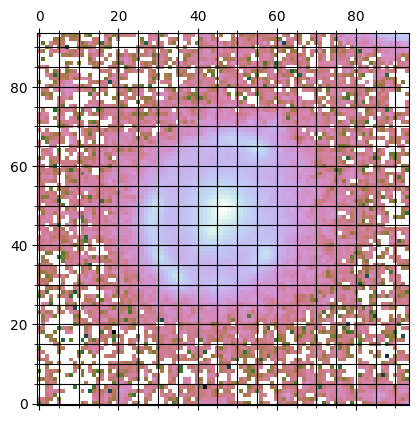

In [17]:
plt.matshow(np.log10(image_data), origin='lower', cmap='cubehelix');
plt.grid(which='both', color='black')
plt.minorticks_on()
plt.grid(which='minor', color='black')
plt.show()

## Creating Mask

[[ 3.8   3.72  3.64 ... -3.48 -3.56 -3.64]
 [ 3.8   3.72  3.64 ... -3.48 -3.56 -3.64]
 [ 3.8   3.72  3.64 ... -3.48 -3.56 -3.64]
 ...
 [ 3.8   3.72  3.64 ... -3.48 -3.56 -3.64]
 [ 3.8   3.72  3.64 ... -3.48 -3.56 -3.64]
 [ 3.8   3.72  3.64 ... -3.48 -3.56 -3.64]] [[-3.8  -3.8  -3.8  ... -3.8  -3.8  -3.8 ]
 [-3.72 -3.72 -3.72 ... -3.72 -3.72 -3.72]
 [-3.64 -3.64 -3.64 ... -3.64 -3.64 -3.64]
 ...
 [ 3.48  3.48  3.48 ...  3.48  3.48  3.48]
 [ 3.56  3.56  3.56 ...  3.56  3.56  3.56]
 [ 3.64  3.64  3.64 ...  3.64  3.64  3.64]]


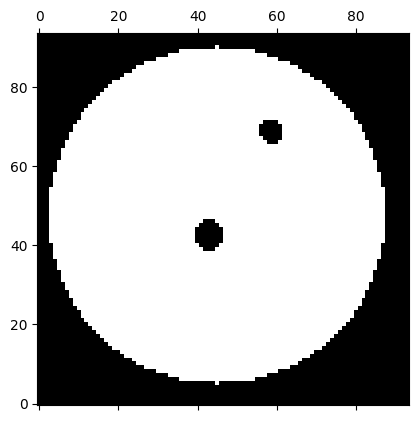

/var/folders/9n/3ndvcp611qzclyd98l4cx0mm0000gn/T/ipykernel_8478/3189106339.py:59: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(masked_image_data), origin='lower', cmap='cubehelix')
/var/folders/9n/3ndvcp611qzclyd98l4cx0mm0000gn/T/ipykernel_8478/3189106339.py:59: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(masked_image_data), origin='lower', cmap='cubehelix')


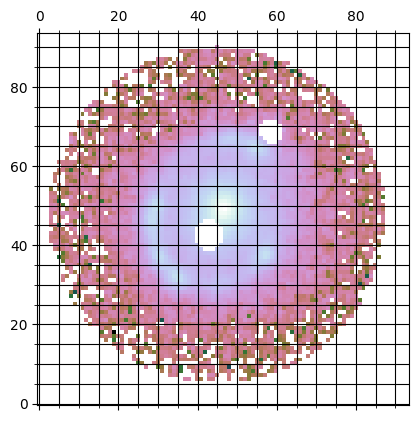

In [18]:
# To make a likelihood mask using lenstronomy functions,
# here is an example code:

from lenstronomy.Util import mask_util
from lenstronomy.Util import util
from lenstronomy.Data.coord_transforms import Coordinates


ra_at_xy_0 = kwargs_data['ra_at_xy_0']
dec_at_xy_0 = kwargs_data['dec_at_xy_0']
transform_pix2angle = kwargs_data['transform_pix2angle']

coords = Coordinates(transform_pix2angle, ra_at_xy_0, dec_at_xy_0)
num_pix = len(kwargs_data['image_data'])

x_coords, y_coords = coords.coordinate_grid(num_pix, num_pix)

print(x_coords, y_coords)

r = 3.4  # arcseconds
lens_center_ra = 0
lens_center_dec = 0

mask_outer = mask_util.mask_center_2d(
    lens_center_ra + 0.2,
    lens_center_dec,
    r,
    util.image2array(x_coords),
    util.image2array(y_coords)
)


mask_ext_1 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra + 0.35,
                                   lens_center_dec-0.4,
                                   0.3, 0.3, 0)

mask_ext_2 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra - 0.9,
                                   lens_center_dec+1.7,
                                   0.25, 0.25, 0)



mask = (1 - mask_outer) * (1- mask_ext_1) * (1- mask_ext_2)

mask[mask >= 1] = 1
mask[mask < 0] = 0

mask = mask.reshape(num_pix, num_pix)

plt.matshow(mask, origin='lower', cmap='cubehelix')
plt.show()

# mask image data
masked_image_data = np.multiply(image_data, mask)

plt.matshow(np.log10(masked_image_data), 
            origin='lower', cmap='cubehelix')
plt.grid(which='both', color='black')
plt.minorticks_on()
plt.grid(which='minor', color='black')
plt.show()

## Building a lens model

In [19]:
lens_model_list = ['EPL', 'SHEAR']
source_model_list = ['SERSIC_ELLIPSE', 'SHAPELETS']
lens_light_model_list = ['SERSIC_ELLIPSE']

In [20]:
# lens galaxy's mass model
fixed_lens = []
kwargs_lens_init = []
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({})  # EPL
fixed_lens.append({'ra_0': 0., 'dec_0': 0.})  # SHEAR

kwargs_lens_init.append({'theta_E': 1., 'gamma': 2., 'e1': 0., 'e2': 0.,
                         'center_x': 0., 'center_y': 0.})
kwargs_lens_init.append({'gamma1': 0., 'gamma2': 0.})


kwargs_lens_sigma.append({'theta_E': .2, 'gamma': .1, 'e1': 0.05, 'e2': 0.05,
                         'center_x': 0.5, 'center_y': 0.5})
kwargs_lens_sigma.append({'gamma1': 0.05, 'gamma2': 0.05})


kwargs_lower_lens.append({'theta_E': 0.01, 'gamma': 1., 'e1': -0.5,
                          'e2': -0.5, 'center_x': -10., 'center_y': -10.})
kwargs_lower_lens.append({'gamma1': -0.4, 'gamma2': -0.4})


kwargs_upper_lens.append({'theta_E': 10., 'gamma': 3., 'e1': 0.5, 'e2': 0.5,
                          'center_x': 10., 'center_y': 10.})
kwargs_upper_lens.append({'gamma1': 0.4, 'gamma2': 0.4})

lens_params = [kwargs_lens_init, kwargs_lens_sigma, fixed_lens,
               kwargs_lower_lens, kwargs_upper_lens]


# lens galaxy's light model
fixed_lens_light = []
kwargs_lens_light_init = []
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({'n_sersic': 4.})  # SERSIC_ELLIPSE
kwargs_lens_light_init.append({'R_sersic': 0.5, 'n_sersic': 2.,
                              'e1': 0., 'e2': 0., 'center_x': 0.,
                               'center_y': 0., 'amp': 16.})
kwargs_lens_light_sigma.append({'n_sersic': 1., 'R_sersic': 0.3,
                               'e1': 0.05, 'e2': 0.05, 'center_x': 0.1,
                                'center_y': 0.1, 'amp': 10.})
kwargs_lower_lens_light.append({'R_sersic': 0.001, 'n_sersic': .5,
                               'e1': -0.5, 'e2': -0.5, 'center_x': -10.,
                                'center_y': -10., 'amp': 0.})
kwargs_upper_lens_light.append({'R_sersic': 10., 'n_sersic': 5.,
                               'e1': 0.5, 'e2': 0.5, 'center_x': 10.,
                                'center_y': 10., 'amp': 100.})

joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]

lens_light_params = [kwargs_lens_light_init, kwargs_lens_light_sigma,
                     fixed_lens_light, kwargs_lower_lens_light,
                     kwargs_upper_lens_light]


# source galaxy's light model
fixed_source = []
kwargs_source_init = []
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({'n_sersic': 1.})  # SERSIC ELLIPSE
fixed_source.append({'n_max': 4})  # SHAPELETS

kwargs_source_init.append({'R_sersic': 0.2, 'n_sersic': 1.,
                          'e1': 0., 'e2': 0., 'center_x': 0.,
                           'center_y': 0., 'amp': 16})
kwargs_source_init.append({'beta': 1., 'center_x': 0., 'center_y': 0.})

kwargs_source_sigma.append({'R_sersic': 0.1, 'n_sersic': 0.5, 'e1': 0.05,
                            'e2': 0.05, 'center_x': 0.2, 'center_y': 0.2,
                            'amp': 10})
kwargs_source_sigma.append({'beta': 0.5, 'center_x': 0.2, 'center_y': 0.2})


kwargs_lower_source.append({'R_sersic': 0.001, 'n_sersic': .5, 'e1': -0.5,
                            'e2': -0.5, 'center_x': -10., 'center_y': -10.,
                            'amp': 0})
kwargs_lower_source.append({'beta': 0.01, 'center_x': -10., 'center_y': -10.})

kwargs_upper_source.append({'R_sersic': 10., 'n_sersic': 5., 'e1': 0.5,
                            'e2': 0.5, 'center_x': 10., 'center_y': 10.,
                            'amp': 100})
kwargs_upper_source.append({'beta': 100, 'center_x': 10., 'center_y': 10.})


source_params = [kwargs_source_init, kwargs_source_sigma,
                 fixed_source, kwargs_lower_source, kwargs_upper_source]


# combining all the above specification in the `kwargs_params` dictionary
kwargs_params = {'lens_model': lens_params,
                 'source_model': source_params,
                 'lens_light_model': lens_light_params}


joint_source_with_source = [[0, 1, ['center_x', 'center_y']]]

In [21]:
kwargs_constraints = {'joint_lens_with_light': joint_lens_with_light,
                      'joint_source_with_source': joint_source_with_source}


#### Numerical settings

No need to change anything here for now. It's also fine to not
understand these settings for now.

In [22]:
kwargs_likelihood = {'check_bounds': True,
                     'image_likelihood_mask_list': [mask]}

kwargs_numerics = {'supersampling_factor': 1,
                   'supersampling_convolution': False
                   }

#### Combining all the information to be sent to lenstronomy

In [23]:
kwargs_model = {'lens_model_list': lens_model_list,
                'source_light_model_list': source_model_list,
                'lens_light_model_list': lens_light_model_list}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {'multi_band_list': multi_band_list,
                     'multi_band_type': 'single-band'
                     # 'multi-linear': every imaging band has independent
                     # solutions of the surface brightness,
                     # 'joint-linear': there is one joint solution of the
                     # linear coefficients demanded across the bands.
                    }

## Here the model fiting is done

In [24]:
from lenstronomy.Workflow.fitting_sequence import FittingSequence


fitting_seq = FittingSequence(
    kwargs_data_joint, kwargs_model, kwargs_constraints,
    kwargs_likelihood, kwargs_params)

fitting_kwargs_list = [['PSO', {'sigma_scale': 1, 'n_particles': 200,
                                'n_iterations': 200}],
                       # ['MCMC', {'n_burn': 200, 'n_run': 600, 'n_walkers':
                       # 200, 'sigma_scale': .1}]
        ]

chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit()

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
Max iteration reached! Stopping.
-2.204122796600761 reduced X^2 of best position
-6140.68611132972 log likelihood
5572 effective number of data points
[{'theta_E': 0.9070279410259663, 'gamma': 1.1237904166385713, 'e1': -0.03659719291421813, 'e2': -0.05026604614969302, 'center_x': 0.06625118062318308, 'center_y': 0.12201717239442778}, {'gamma1': -0.035943337111668874, 'gamma2': -0.05945322328146297, 'ra_0': 0.0, 'dec_0': 0.0}] lens result
[{'amp': 1, 'R_sersic': 0.04442895232810374, 'n_sersic': 1.0, 'e1': -0.011993370223070624, 'e2': -0.4995776671975869, 'center_x': 0.09116204523332608, 'center_y': 0.10939159571794026}, {'amp': 1, 'n_max': 4, 'beta': 0.03307472540851832, 'center_x': 0.09116204523332608, 'center_y': 0.10939159571794026}] source result
[{'amp': 1, 'R_sersic': 0.5833611623793058, 'n_sersic': 4.0, 'e1': -0.03659719291421813, 'e2': -0.05026604614969302, 'center_x': 0.0662511806231830

## Visualizing the fitted model

-2.1915367973286872 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.1915367973286943


/Users/rafee_adnan/envs/bdlensing/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/rafee_adnan/envs/bdlensing/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/rafee_adnan/envs/bdlensing/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/var/folders/9n/3ndvcp611qzclyd98l4cx0mm0000gn/T/ipykernel_8478/2971554730.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


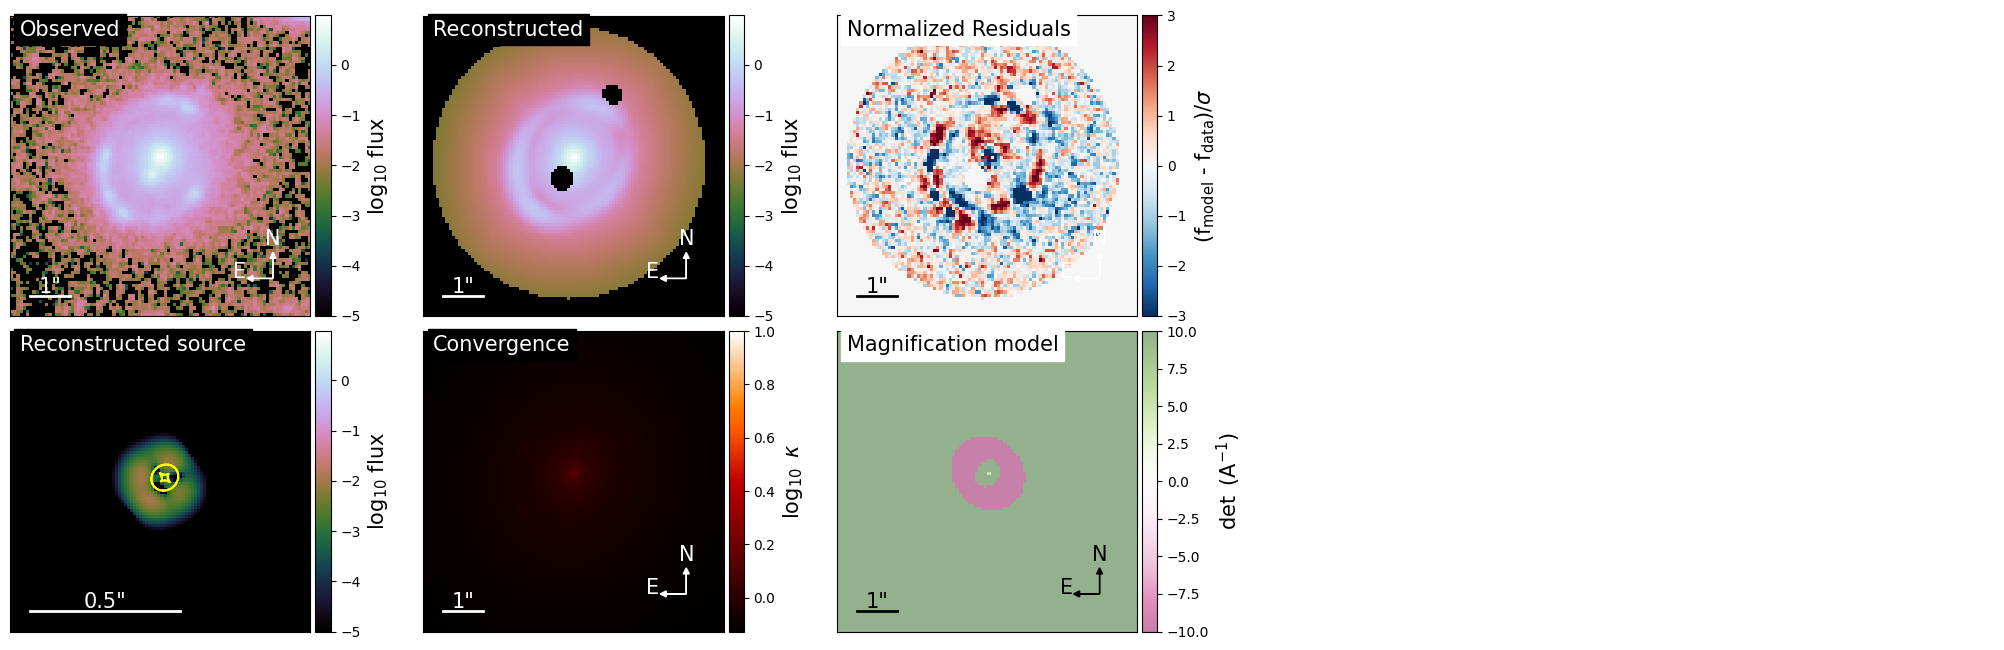

/Users/rafee_adnan/envs/bdlensing/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:506: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(model), origin='lower', vmin=v_min, vmax=v_max,


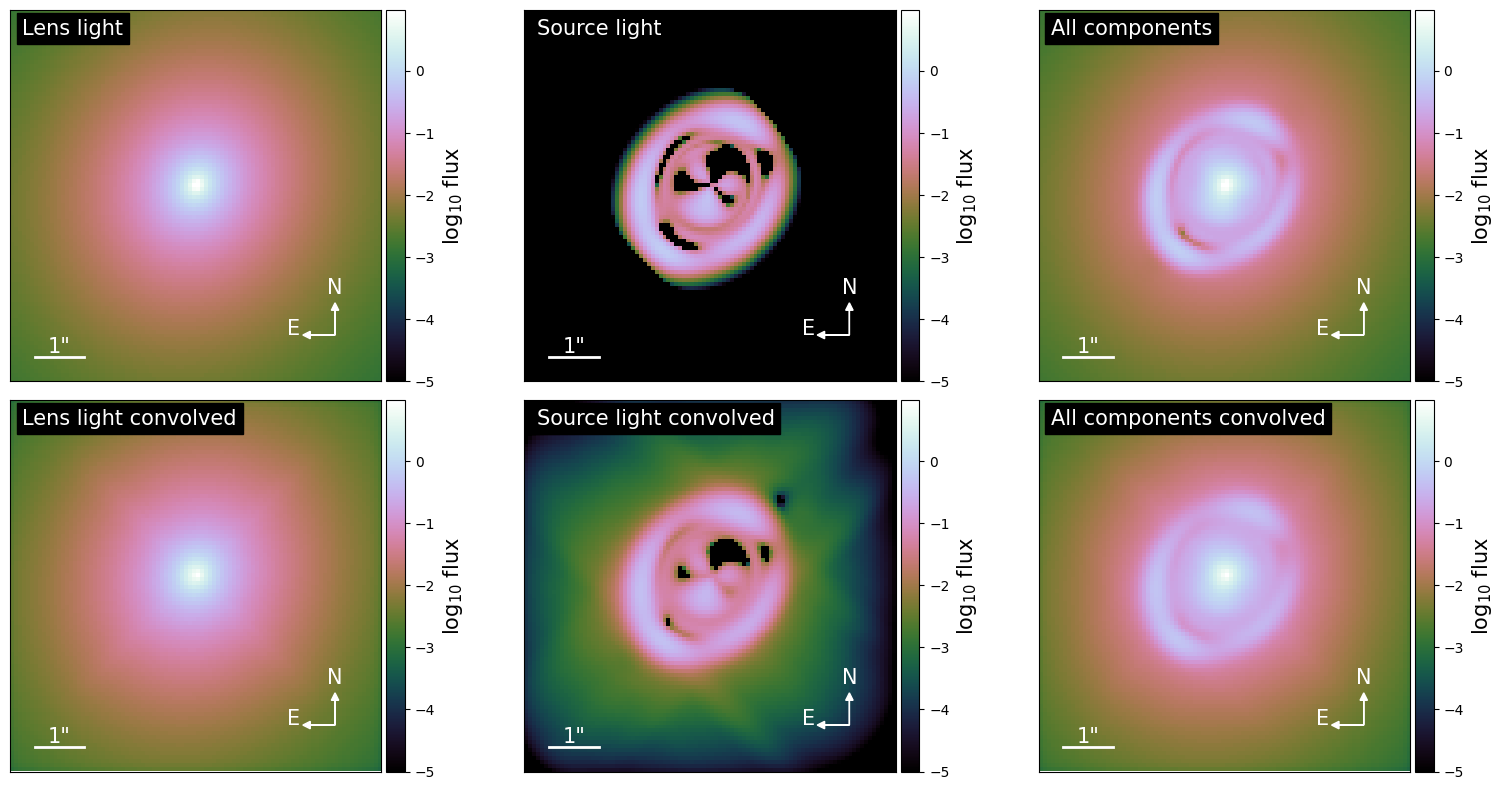

{'kwargs_lens': [{'theta_E': 0.9070279410259663, 'gamma': 1.1237904166385713, 'e1': -0.03659719291421813, 'e2': -0.05026604614969302, 'center_x': 0.06625118062318308, 'center_y': 0.12201717239442778}, {'gamma1': -0.035943337111668874, 'gamma2': -0.05945322328146297, 'ra_0': 0.0, 'dec_0': 0.0}], 'kwargs_source': [{'amp': 1, 'R_sersic': 0.04442895232810374, 'n_sersic': 1.0, 'e1': -0.011993370223070624, 'e2': -0.4995776671975869, 'center_x': 0.09116204523332608, 'center_y': 0.10939159571794026}, {'amp': 1, 'n_max': 4, 'beta': 0.03307472540851832, 'center_x': 0.09116204523332608, 'center_y': 0.10939159571794026}], 'kwargs_lens_light': [{'amp': 1, 'R_sersic': 0.5833611623793058, 'n_sersic': 4.0, 'e1': -0.03659719291421813, 'e2': -0.05026604614969302, 'center_x': 0.06625118062318308, 'center_y': 0.12201717239442778}], 'kwargs_ps': [], 'kwargs_special': {}, 'kwargs_extinction': []}


In [25]:
from lenstronomy.Plots.model_plot import ModelPlot

model_plot = ModelPlot(
    multi_band_list, kwargs_model, kwargs_result,
    arrow_size=0.02, cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood['image_likelihood_mask_list']
)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0, 0])
model_plot.normalized_residual_plot(
    ax=axes[0, 2], v_min=-3, v_max=3, cmap='RdBu_r'
)
model_plot.source_plot(
    ax=axes[1, 0], deltaPix_source=0.01,
    numPix=100, with_caustics=True, scale_size=0.5
)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap='gist_heat')
model_plot.magnification_plot(ax=axes[1, 2], cmap='PiYG')
f.tight_layout()
f.subplots_adjust(
    left=None, bottom=None, right=None,
    top=None, wspace=0., hspace=0.05
)
plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(
    ax=axes[0, 0], text='Lens light', lens_light_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 0], text='Lens light convolved', lens_light_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 1], text='Source light', source_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 1], text='Source light convolved', source_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 2], text='All components', source_add=True,
    lens_light_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 2], text='All components convolved', source_add=True,
    lens_light_add=True, point_source_add=True
)
f.tight_layout()
f.subplots_adjust(
    left=None, bottom=None, right=None,
    top=None, wspace=0., hspace=0.05
)
plt.show()
print(kwargs_result)